# Facial Expression Classifier with Convolutional Neural Network

&nbsp;

***Module aims***:
1. To enable learners to understand the concept of Convolutional Neural Network (CNN)
2. To enable learners to implement basic CNN with Tensorflow and Keras

&nbsp;

***Module intended learning outcome***:

Upon completion of the module, learners are expected to be able to:
  1. Understand what is Convolutional Neural Network
  2. Implement basic CNN with Tensorflow and Keras
  3. Adjust parameters of the Model

&nbsp;

***Schedule of work***:

1. Start Google Colab with GPU
2. Import required modules
3. Download dataset
4. Load the dataset into TF Dataset
5. Inspect the dataset
6. Pre-process the dataset
7. Create the model
8. Compile the model
9. Fit the model
10. Visualize the model result

In [1]:
# import os

# for i in range(1, 53):
#     folder_name = f"quality_faces_mini/{str(i).zfill(3)}"
#     os.makedirs(folder_name)

<hr>

# Schedule 2: Import required modules

In the previous exercise, we have created Machine Learning models with the Scikit-learn (sklearn) library. In this exercise, we will use Tensorflow with Keras to build a Deep Learning model.

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

Keras is an open source neural network library written in Python. It is capable of running on top of TensorFlow. It is designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

Overall, with Tensorflow and Keras, we can easily build our neural networks with high level API.

Visit the following link if you want to learn more about TensorFlow:

https://www.tensorflow.org

&nbsp;

***Get Started***

After creating a python file or a colab notebook, we need to  import the required libraries and the modules for the task.

The required modules are:
- `tensorflow`
- `matplotlib.pyplot`
- `pathlib`


Data scientists usually use Tensorflow or PyTorch to help build the Deep Learning models. In the course of Tecky, we will learn Tensorflow rather than PyTorch since Tensorflow would be a better option for an end-to-end deep learning platform.

Matplotlib is a common visualiser tool for data science tasks. It is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

&nbsp;

*In this exercise:*

We will use `tensorflow` to preprocess the dataset and build our model for convolutional neural networks.

We will use `matplotlib` to help visualize the images and predicted results.

We will use `pathlib` to handle the the path of downloaded zip file.





In [2]:
import matplotlib.pyplot as plt


In [3]:
# !pip install tensorflow

In [4]:
# import tensorflow as tf

# print(tf.__version__)

<hr>

# Schedule 3: Download dataset

First we need to download the dataset from the following link. We don't need to download the dataset manually, instead, the dataset can be downloaded using the builtin function of Tensorflow.

Since the downloaded file is a zip, we also need to unzip the file before using it. The `tf.keras.utils.get_file` function can help us to download and also unzip the file. By default, the dataset will be stored in the folder `/root/.keras/datasets`.



In [5]:
PATH = 'quality_faces_mini/'
print(PATH)




quality_faces_mini/


We would like to know what files or folders are inside the unzipped folder. In Colab, we can run the shell command with "!", e.g. `!ls /root/.keras/datasets/ck48_facial_data` will run the "ls /root/.keras/datasets/ck48_facial_data" command to list the files/folders in the "ck48_facial_data" folder.


In [6]:
!dir quality_faces_mini/


001yua_mikami	     035ryo_ayumi	   069hikari_sena
002ichika_matsumoto  036suzume_mino	   070hinako_mori
003tojo_natsu	     037riri_nanatsumori   071minamo
004shirato_hana      038alice_otsu	   072hikari_azusa
005saika_kawakita    039yura_kano	   073rikka_ono
006karen_yuzuriha    040nozomi_ishihara    074mai_hanakari
007himari_kinoshita  041nana_yagi	   075rina_takase
008yu_shinoda	     042kana_momonogi	   076alice_kisaki
009non_ohana	     043umi_yatsugake	   077minami_hatsukawa
010rima_arai	     044yui_hatano	   078yuri_oshikawa
011mei_satsuki	     045julia_yoshine	   079rika_tsubaki
012mizuki_yayoi      046konatsu_kashiwagi  080rino_yuki
013remu_suzumori     047maron_natsuki	   081akari_niimura
014momo_sakura	     048tsukasa_aoi	   082fuua_kaede
015shiose	     049saeko_matsushita   083arisu_shinomiya
016mio_ishikawa      050sora_amakawa	   084luna_tsukino
017rena_momozono     051suzu_honjo	   085mayu_suzuki
018mayuki_ito	     052rikako_inoue	   086ruka_inaba
019nene_tanaka	     053mih

In [7]:
!dir quality_faces_mini/094marina_shiraishi


100000009827_0.jpg  1300004420_0.jpg  1560387374_0.jpg	1661502760_0.jpg
100000010545_0.jpg  1300004981_0.jpg  1560387500_0.jpg	1663986524_0.jpg
100000012845_0.jpg  1300005047_0.jpg  1560387753_0.jpg	1666400010_0.jpg
100000013128_0.jpg  1300005179_0.jpg  1560387824_0.jpg	1673497177_0.jpg
1300000460_0.jpg    1300005575_0.jpg  1560387946_0.jpg	2000000275_0.jpg
1300000526_0.jpg    1300005641_0.jpg  1560388328_0.jpg	2000000341_0.jpg
1300000592_0.jpg    1300005839_0.jpg  1560388343_0.jpg	2000000473_0.jpg
1300000724_0.jpg    1310029603_0.jpg  1560388466_0.jpg	2000000539_0.jpg
1300000790_0.jpg    1310029609_0.jpg  1570239835_0.jpg	2000000671_0.jpg
1300001318_0.jpg    1310029615_0.jpg  1581861545_0.jpg	2000001199_0.jpg
1300001384_0.jpg    1310029623_0.jpg  1581861707_0.jpg	2000001265_2.jpg
1300001516_0.jpg    1310029638_0.jpg  1581863863_0.jpg	2000001265_3.jpg
1300001582_0.jpg    1310029639_0.jpg  1600003499_0.jpg	2000001397_0.jpg
1300002341_0.jpg    1310029644_0.jpg  1600003506_0.jpg	200000146

7 folders are found inside the "ck48_facial_data" folder with each folder containing lots of images of facial expressions. These images are the input for the later model and the expressions (folder name) are the expected outputs of the model.

For example, images inside the "happy" folder means that the facial expressions of the human inside the images are "happy". When a trained model reads the image and predicts the expression, it should output "happy" as the answer!

Since there are 7 classes for the answer option, we create a list to store all the class names.



In [8]:
# 憤怒、蔑視、厭惡、恐懼、高興、悲傷、驚訝
classes = ["横宮七海","三上悠亞","松本いちか","東條なつ","白桃はな","河北彩花","楪カレン","木下ひまり","篠田優","小花のん",
"新井リマ","沙月恵奈","彌生美月","涼森玲夢","櫻空桃","有栖花あか","石川澪","桃園怜奈","伊藤舞雪","田中ねね",
"神宮寺奈緒","倉本すみれ","鷲尾めい","天使萌","安齋らら","天音まひな","二階堂夢","Julia","美谷朱里","姫咲はな",
"藤森里穂","明里紬","紗倉真奈","山手梨愛","戶田真琴","愛弓りょう","美乃すずめ","七ツ森りり","乙アリス","架乃由羅",
"石原希望","八木奈々","桃乃木香奈","八掛うみ","波多野結衣","吉根柚莉愛","柏木こなつ","夏希栗","葵司","松下紗榮子",
"天川空","本庄鈴","小湊よつ葉","羽咲みはる","希島愛理","奧田咲","加美杏奈","明日見未来","黑川堇","橋本有菜",
"沙月恵奈","夢乃愛華","古川伊織","辻井穗乃果","森沢かな","山岸逢花","相澤南","水卜櫻","小倉由菜","瀬名ひかり",
"森日向子","Minamo","梓ヒカリ","小野六花","花狩まい","高瀬りな","希咲アリス","初川南","推川悠里","椿りか",
"結城りの","新村晶","楓ふうあ","四宮ありす","月乃露娜","鈴木真夕","稻場流花","河合明日菜","楓可憐","川上奈奈美",
"望月絢香","宮下玲奈","中山文香","庵ひめか","白石茉莉奈","有岡みう","工藤ララ","美波もも","南乃そら","深田詠美"]
classes


['横宮七海',
 '三上悠亞',
 '松本いちか',
 '東條なつ',
 '白桃はな',
 '河北彩花',
 '楪カレン',
 '木下ひまり',
 '篠田優',
 '小花のん',
 '新井リマ',
 '沙月恵奈',
 '彌生美月',
 '涼森玲夢',
 '櫻空桃',
 '有栖花あか',
 '石川澪',
 '桃園怜奈',
 '伊藤舞雪',
 '田中ねね',
 '神宮寺奈緒',
 '倉本すみれ',
 '鷲尾めい',
 '天使萌',
 '安齋らら',
 '天音まひな',
 '二階堂夢',
 'Julia',
 '美谷朱里',
 '姫咲はな',
 '藤森里穂',
 '明里紬',
 '紗倉真奈',
 '山手梨愛',
 '戶田真琴',
 '愛弓りょう',
 '美乃すずめ',
 '七ツ森りり',
 '乙アリス',
 '架乃由羅',
 '石原希望',
 '八木奈々',
 '桃乃木香奈',
 '八掛うみ',
 '波多野結衣',
 '吉根柚莉愛',
 '柏木こなつ',
 '夏希栗',
 '葵司',
 '松下紗榮子',
 '天川空',
 '本庄鈴',
 '小湊よつ葉',
 '羽咲みはる',
 '希島愛理',
 '奧田咲',
 '加美杏奈',
 '明日見未来',
 '黑川堇',
 '橋本有菜',
 '沙月恵奈',
 '夢乃愛華',
 '古川伊織',
 '辻井穗乃果',
 '森沢かな',
 '山岸逢花',
 '相澤南',
 '水卜櫻',
 '小倉由菜',
 '瀬名ひかり',
 '森日向子',
 'Minamo',
 '梓ヒカリ',
 '小野六花',
 '花狩まい',
 '高瀬りな',
 '希咲アリス',
 '初川南',
 '推川悠里',
 '椿りか',
 '結城りの',
 '新村晶',
 '楓ふうあ',
 '四宮ありす',
 '月乃露娜',
 '鈴木真夕',
 '稻場流花',
 '河合明日菜',
 '楓可憐',
 '川上奈奈美',
 '望月絢香',
 '宮下玲奈',
 '中山文香',
 '庵ひめか',
 '白石茉莉奈',
 '有岡みう',
 '工藤ララ',
 '美波もも',
 '南乃そら',
 '深田詠美']

<hr>

# Schedule 4: Load the dataset into TF Dataset

Here we will use the `tf.keras.utils.image_dataset_from_directory` from TensorFlow to load the images (RGB pixels) from the "ck48_facial_data" folder. This function can help us easily load all the images into `tf.Dataset`. `tf.Dataset` is a special data structure of TensorFlow and it is a container to store our features and labels.
 
Since we have 7 folders ("angry", "contempt", "disgust", "fear", "happy", "sadness", "surprise"), the label for images inside "angry" will be 0, images inside "contempt" will be 1, images inside the Nth folder will be N-1.
 
We will use 80% (1 - validation_split = 0.8) samples for the training dataset and 20% (validation_split = 0.2 ) samples for the validation dataset. We use training dataset for training the model and validation dataset for testing the model during the training stage.
 
Therefore, we have 785 samples for training and 196 samples for validation.


In [9]:
import tensorflow as tf
train_dataset = tf.keras.utils.image_dataset_from_directory(PATH, color_mode="rgb",
                                                      batch_size=32, image_size=(96, 96),
                                                      shuffle=True, seed=42,
                                                      subset="training", validation_split=0.2)

valid_dataset = tf.keras.utils.image_dataset_from_directory(PATH, color_mode="rgb",
                                                      batch_size=32, image_size=(96, 96),
                                                      shuffle=True, seed=42,
                                                      subset="validation", validation_split=0.2)


2023-05-14 10:31:53.047342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 10:31:53.873978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 10776 files belonging to 101 classes.
Using 8621 files for training.


2023-05-14 10:31:55.401067: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 10776 files belonging to 101 classes.
Using 2155 files for validation.


<hr>

# Schedule 5: Inspect the dataset


Now we are going to inspect the dataset we have just loaded. The type of the `tf.dataset` is a batch dataset. That means the data is separated into different batches with the batch size equal to 32.
 
You can refer to official documentation for detailsabout the tensorflow data and the data pipeline:

https://www.tensorflow.org/guide/data

When the batch size is set to 32, each batch will have 32 samples (feature + label). During the training stage, the model input batches of samples for calculation instead of single samples.
 
If the batch size is 32 (each batch has 32 samples) and we have 981 samples for training dataset, we will have 25 (785 / 32 = 24.53 and round up) batches for training dataset.

If the batch size is 32 (each batch has 32 samples) and we have 196 samples for training dataset, we will have 7 (196 / 32 = 6.125 and round up) batches for validation dataset.

In [10]:
print("Number of batch for the train dataset:", len(train_dataset))
print("Number of batch for the valid dataset:", len(valid_dataset))


Number of batch for the train dataset: 270
Number of batch for the valid dataset: 68


Each sample in the dataset is saved as tensor format. Tensor is the format in TensorFlow to store the data. It represents a multidimensional array of elements. We can look at the `dataset.element_spec` to check the information of the tensor.
 
Here we can see that the shape of the feature is `(48, 48, 3)` for representing a single image of size equal to 48 x 48. The last number is 3 because an RGB image has 3 colors (R, G and B) so that each pixel will have 3 numbers.

&nbsp;

<img src="https://e2eml.school/images/image_processing/three_d_array.png" alt="" width="60%"/>


In [11]:
print("TensorSpec of the train dataset:", train_dataset.element_spec)
print("TensorSpec of the valdi dataset:", valid_dataset.element_spec)



TensorSpec of the train dataset: (TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
TensorSpec of the valdi dataset: (TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


Lets try to visualize one of the sample:


古川伊織



2023-05-14 10:31:55.937091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8621]
	 [[{{node Placeholder/_0}}]]
2023-05-14 10:31:55.937405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8621]
	 [[{{node Placeholder/_0}}]]


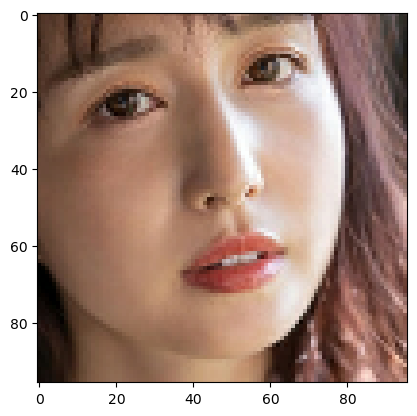

In [12]:
for image_batch, label_batch in train_dataset.take(1):
  first_image = image_batch[0]
  first_label = label_batch[0]
  image = tf.cast(first_image, tf.float32)
  image = image / 255
  print(classes[first_label.numpy()])
  print()
  plt.imshow(image)


<hr>

# Schedule 6: Pre-process the dataset

We need to pre-process the data before the training stage. One of the reasons is we would like our model to have better training performance.
 
Here we will normalize the features (from the range of `0 - 255` to `0 - 1`). And one-hot encodes the label data because of the mathematical reason for the multi-class classification problem.
 
We use `.map(preprocess)` to apply the preprocessing step to every batch of the dataset.
 


In [13]:
def preprocess(image, label):
  new_image = tf.cast(image, tf.float32)
  new_image = new_image / 255
  new_label = tf.one_hot(label, len(classes))
  return new_image, new_label


In [14]:
train_dataset = train_dataset.cache().map(preprocess).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.cache().map(preprocess).prefetch(tf.data.AUTOTUNE)


<hr>

# Schedule 7: Create the model

Here comes the most difficult part of the exercise. In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery.
 
A convolutional neural network consists of an input layer, hidden layers and an output layer. In any feed-forward neural network, any middle layers are called hidden because their inputs and outputs are masked by the activation function.
 
In a convolutional neural network, the hidden layers include layers that perform convolutions. Each convolutional neural inside the convolutional layers (layers for convolutions) processes/studies data only for its receptive field.
 
&nbsp;
 
The architecture of normal CNNs:
 
&nbsp;
 
<img src="https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" alt="" width="80%"/>
 
&nbsp;
 
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png" alt="" width="60%"/>


There are some types of layer we will use to build the Convolutional Neural Networks.

They are:

- Convolutional (CONV)

- Activation (ACT or Specific Activation Name)

- Pooling (POOL)

- Fully-connected (FC)

- Batch Normalization (BN)

- Dropout (DO)

&nbsp;

The architecture for our model (in text format):

<h3>
INPUT -> [CONV -> BN -> RELU] -> POOL -> <br/>
[CONV -> BN -> RELU] -> POOL -> <br/>
[CONV -> BN -> RELU] -> POOL -> <br/>
[FC -> RELU -> DO] -> SOFTMAX
</h3>


In [15]:
# import tensorflow as tf

# tf.keras.backend.set_image_data_format('channels_last')

# input = tf.keras.layers.Input(shape=(96, 96, 3))

# # Data augmentation
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
# ])

# x = data_augmentation(input)

# x = tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding="same")(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.ReLU()(x)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),data_format="channels_last")(x)

# x = tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding="same")(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.ReLU()(x)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),data_format="channels_last")(x)

# x = tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), padding="same")(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.ReLU()(x)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2),data_format="channels_last")(x)

# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(512, activation="relu")(x)
# x = tf.keras.layers.Dropout(rate=0.5)(x)

# output = tf.keras.layers.Dense(len(classes), activation="softmax")(x)

# model = tf.keras.Model(inputs=input, outputs=output, name="my_first_cnn")
# model.summary()


In [16]:
# pip install --upgrade tensorflow

In [17]:
# pip install --upgrade keras

In [18]:
# pip install keras_applications==1.0.8

In [19]:
# image_batch, label_batch = next(iter(train_dataset.take(1)))
# print(image_batch.shape)

In [ ]:
pip install tf-models-official

In [50]:
import tensorflow as tf

tf.keras.backend.set_image_data_format('channels_last')

# Load the pre-trained model without the top (classification) layers
base_model = tf.keras.applications.MobileNetV2(
weights='imagenet',
include_top=False,
input_shape=(96, 96, 3)
)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Add a learning rate scheduler
# lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
# monitor='val_loss',
# factor=0.2,
# patience=5,
# verbose=1,
# mode='auto',
# min_delta=0.0001,
# cooldown=0,
# min_lr=1e-7
# )

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_16[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

 <hr>

# Schedule 8: Compile the model

We will compile the model before training it. We will use gradient descent for the optimization algorithm and cross entropy for the loss function.

A loss function is a method of evaluating how well your algorithm models your dataset.

Optimization is the process of improving the model to reduce the loss or increase efficiency.


In [22]:
# opt = tf.keras.optimizers.SGD()
# loss = tf.keras.losses.CategoricalCrossentropy()

# model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])


 <hr>

# Schedule 9: Fit the model

Finally we can train the model !!!

We might find the below metrics displayed on the console during the training:
 
- **loss:** training loss/error
- **accuracy:** training accuracy
- **val_loss:** validation loss/error
- **val_accuracy:** validation accuracy
 
During the training period, we should see that the training loss is decreasing while the training accuracy is increasing.
 
However, in the early epochs, the validation accuracy is smaller than the training accuracy, what does that mean?

In [23]:
# model.fit(train_dataset, epochs=25, validation_data=valid_dataset)


In [56]:
# Train the model
model.fit(train_dataset, epochs=95, validation_data=valid_dataset)

Epoch 1/5
270/270 [==============================] - 15s 56ms/step - loss: 1.1703 - accuracy: 0.6870 - val_loss: 2.6992 - val_accuracy: 0.3624
Epoch 2/5
270/270 [==============================] - 15s 54ms/step - loss: 1.1569 - accuracy: 0.6897 - val_loss: 2.6997 - val_accuracy: 0.3643
Epoch 3/5
270/270 [==============================] - 15s 54ms/step - loss: 1.1489 - accuracy: 0.6957 - val_loss: 2.7015 - val_accuracy: 0.3619
Epoch 4/5
270/270 [==============================] - 15s 55ms/step - loss: 1.1206 - accuracy: 0.6970 - val_loss: 2.7048 - val_accuracy: 0.3708
Epoch 5/5
270/270 [==============================] - 14s 54ms/step - loss: 1.1154 - accuracy: 0.7026 - val_loss: 2.6816 - val_accuracy: 0.3675


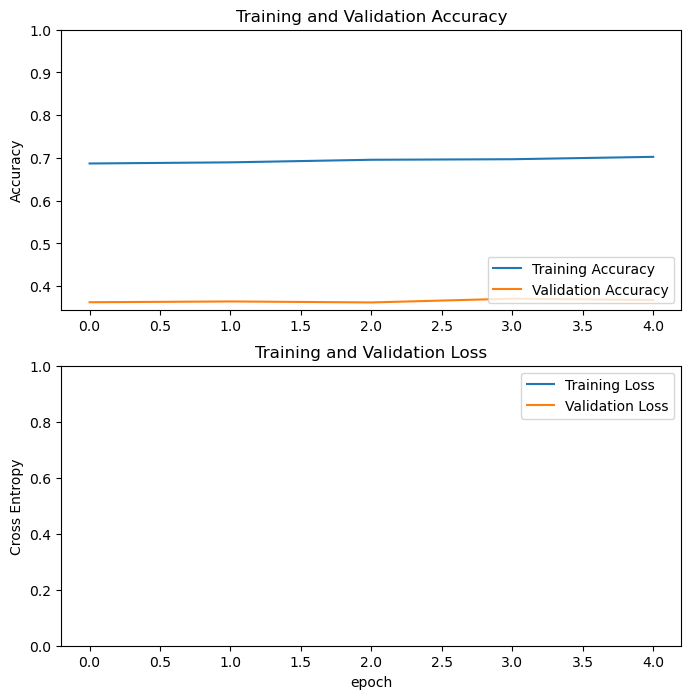

In [61]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history object
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

 <hr>

# Schedule 10: Visualize the model result

We can make some predictions using the validation data and visualize the results by Matplotlib.

1/1 [==============================] - 0s 61ms/step


2023-05-14 14:24:01.885415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2155]
	 [[{{node Placeholder/_0}}]]
2023-05-14 14:24:01.885764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2155]
	 [[{{node Placeholder/_4}}]]


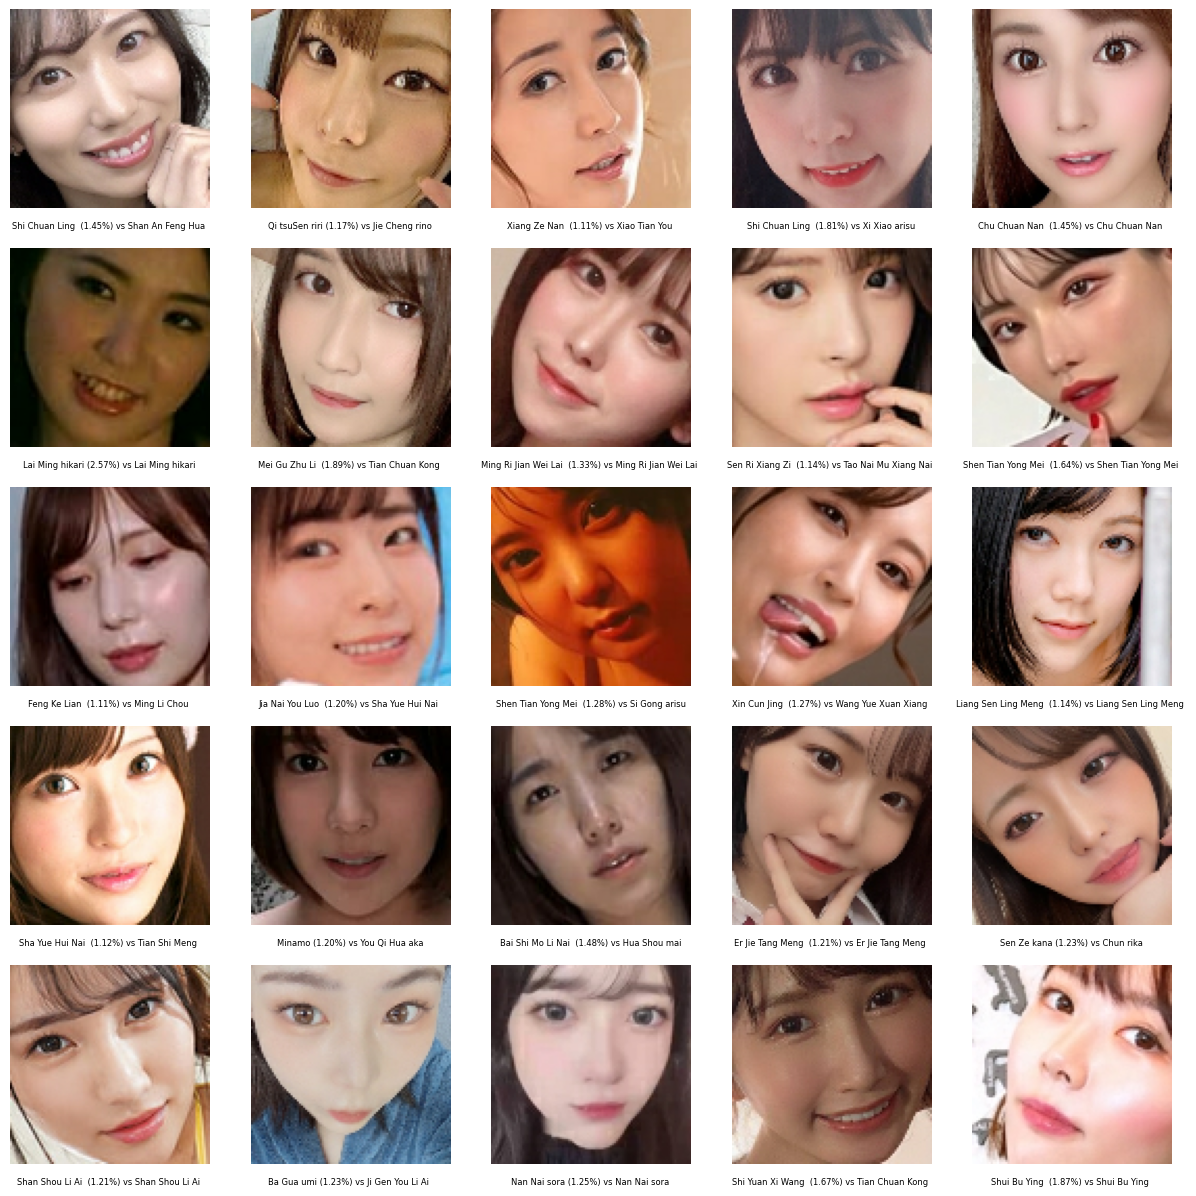

1/1 [==============================] - 0s 55ms/step


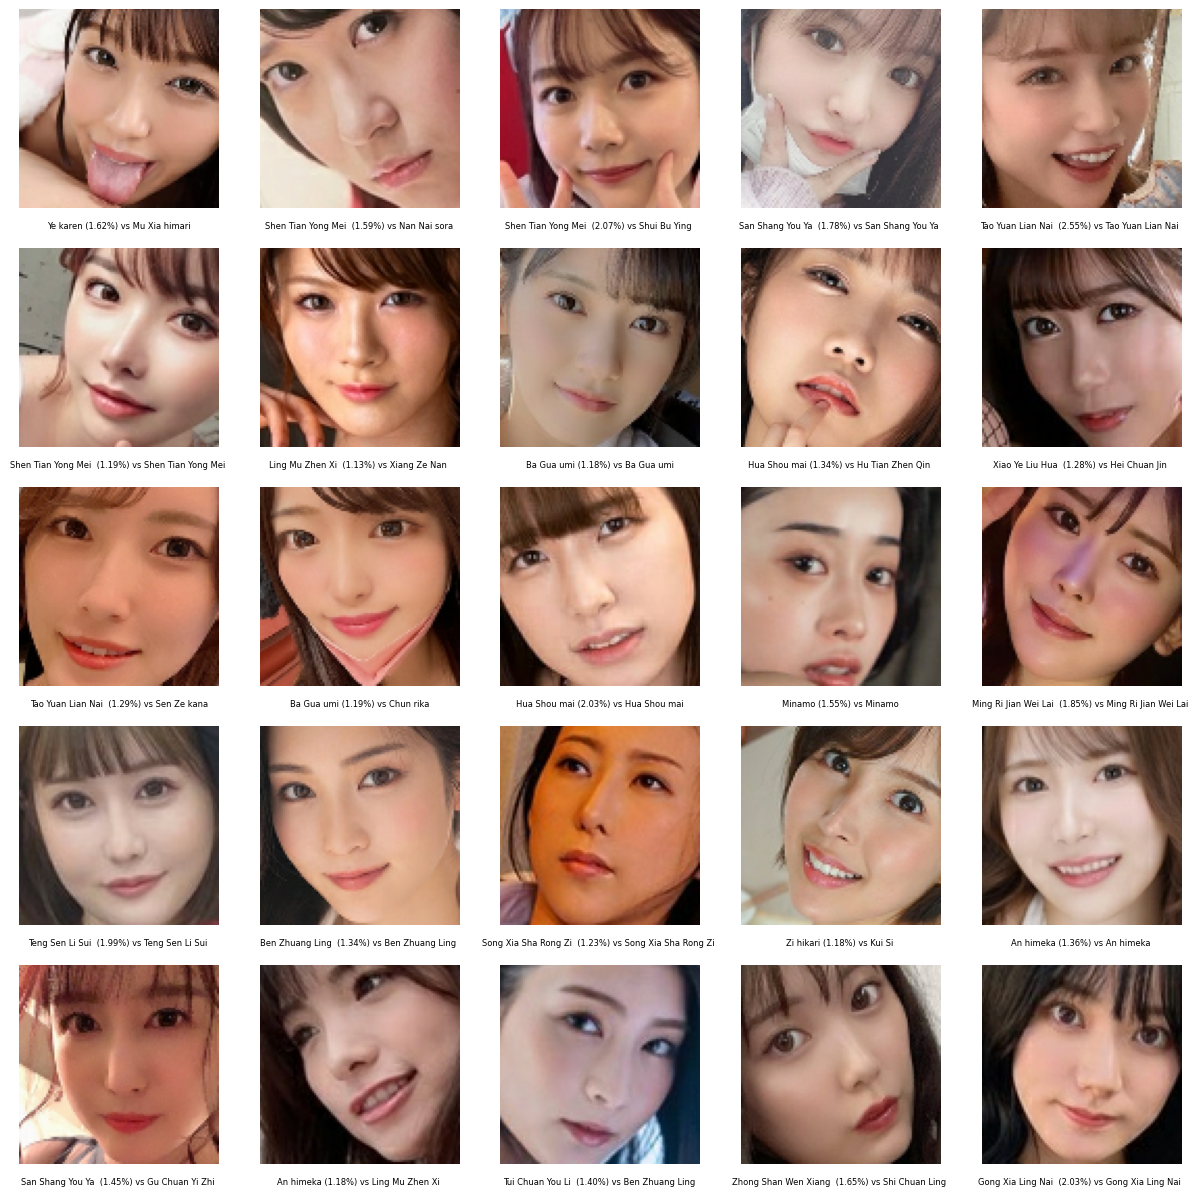

1/1 [==============================] - 0s 54ms/step


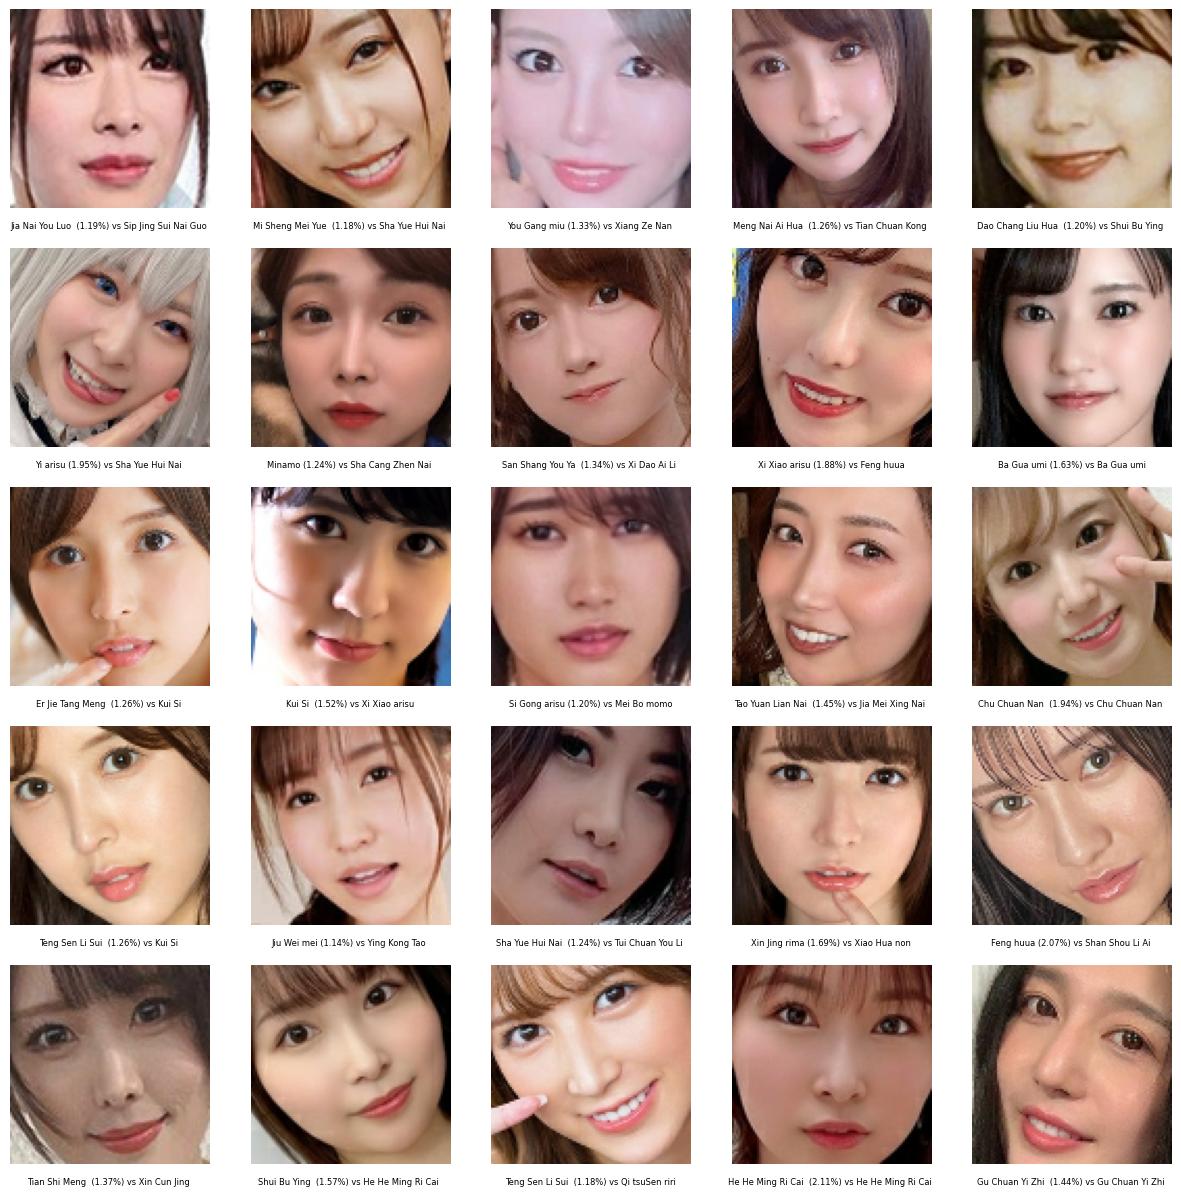

1/1 [==============================] - 0s 56ms/step


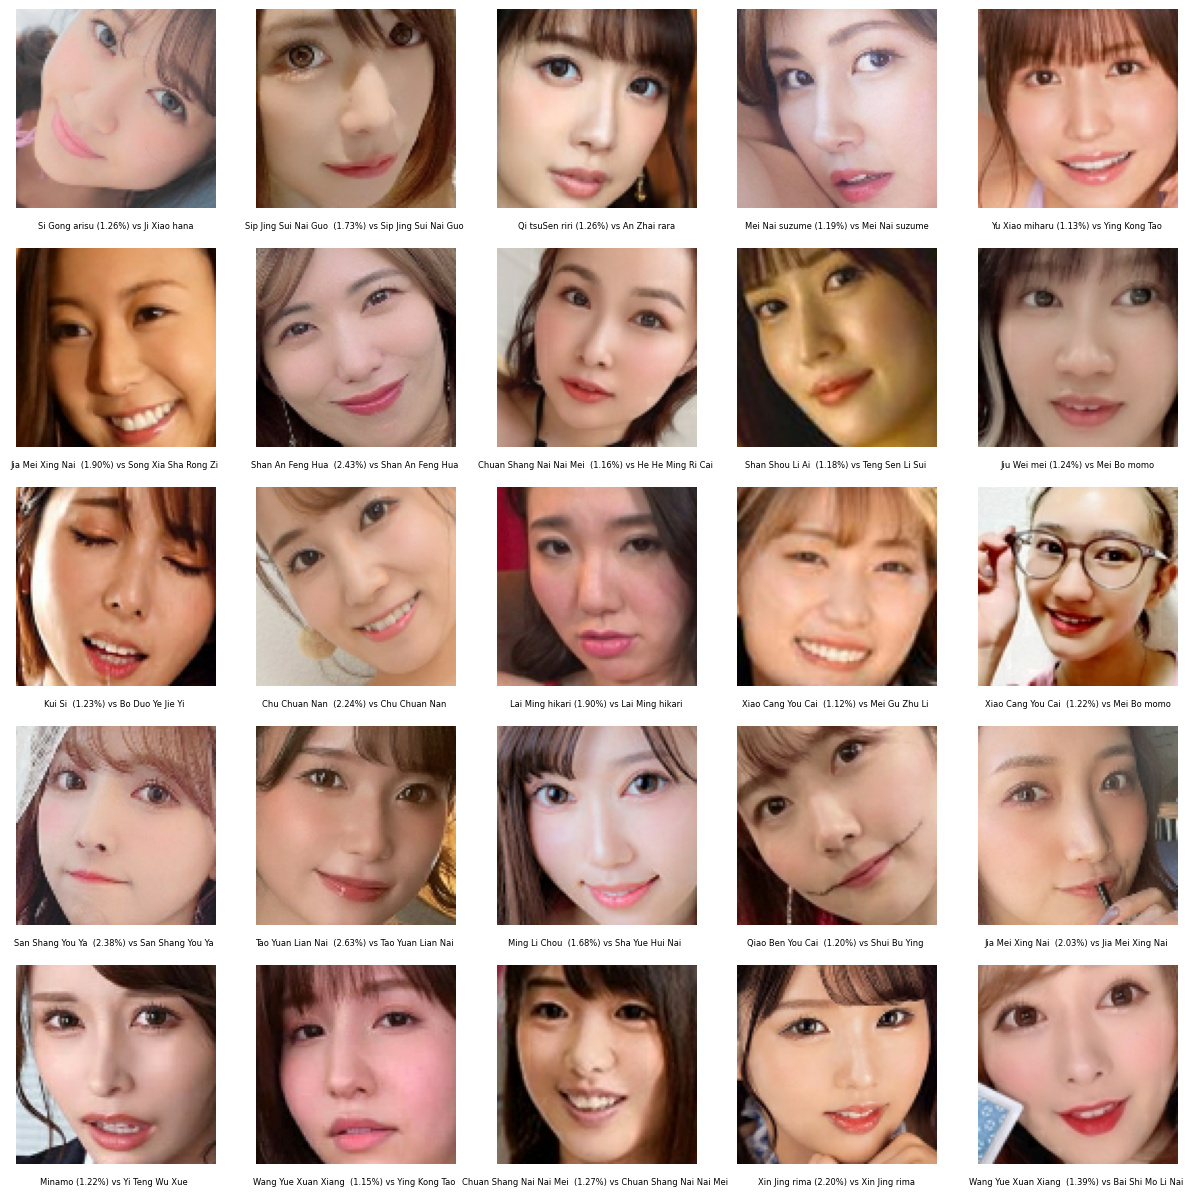

1/1 [==============================] - 0s 55ms/step


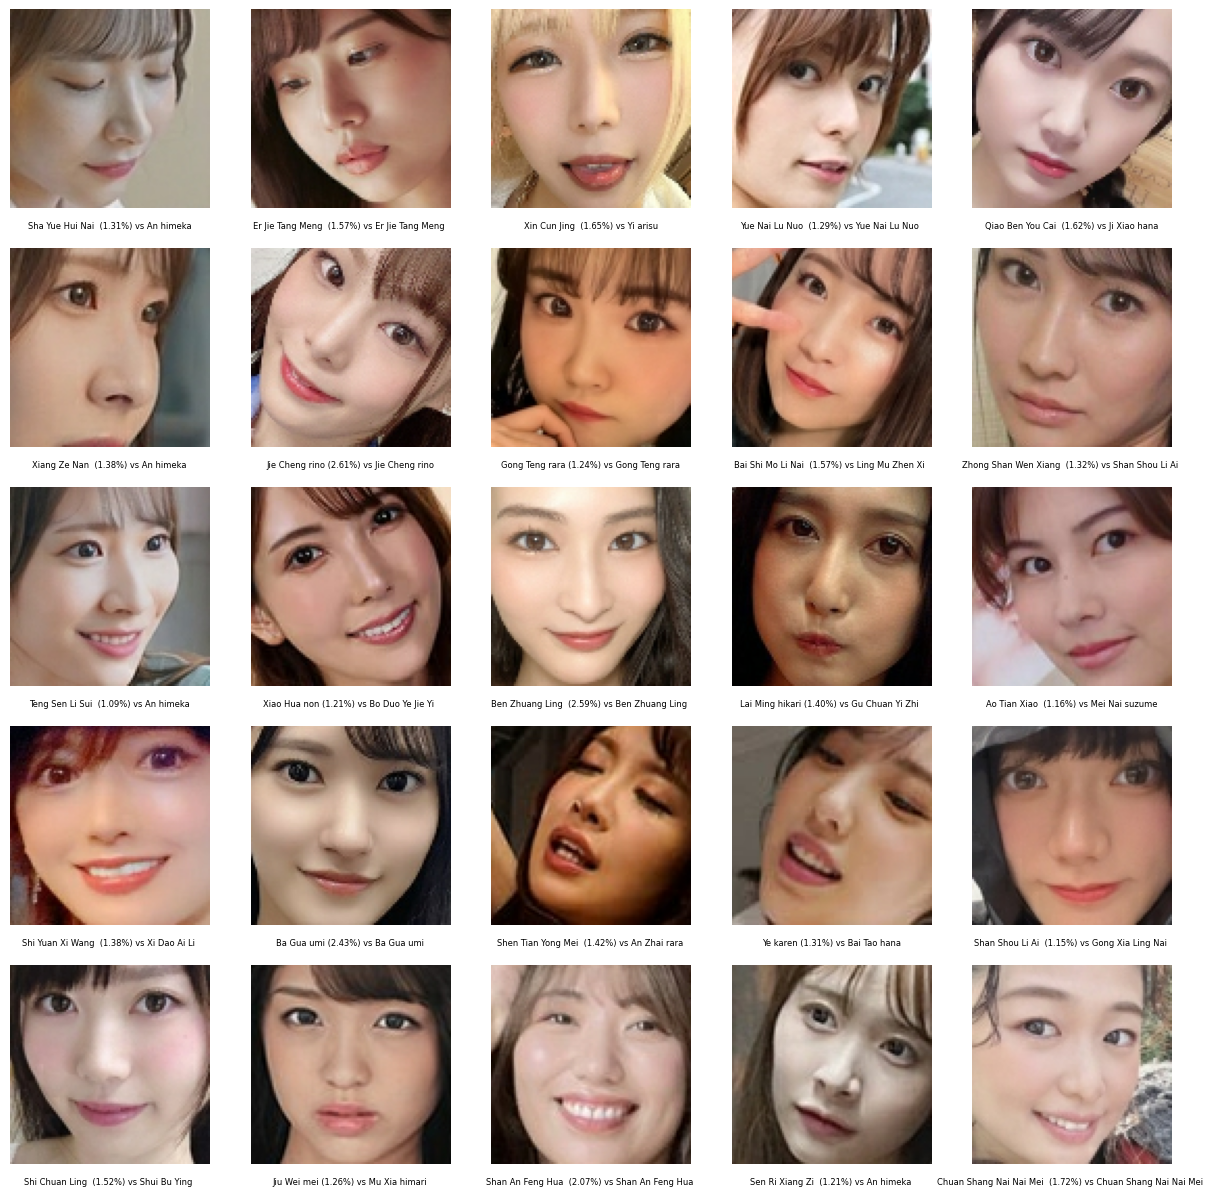

In [64]:
from unidecode import unidecode

for image_batch, label_batch in valid_dataset.take(5):
    preds = model.predict(image_batch)
    preds_softmax = tf.nn.softmax(preds, axis=-1).numpy()  # Calculate softmax probabilities
    preds_argmax = tf.argmax(preds, axis=-1).numpy()
    target = tf.argmax(label_batch, axis=-1)

    fig = plt.figure(figsize=(15, 15))
    count = 0
    for i in range(5):
        for j in range(5):
            ax = fig.add_subplot(5, 5, count + 1)
            ax.axis('off')
            pred_class = unidecode(classes[preds_argmax[count]])
            pred_prob = preds_softmax[count][preds_argmax[count]] * 100  # Get the probability for the predicted class
            target_class = unidecode(classes[target[count]])
            ax.text(0.5, -0.1, f"{pred_class} ({pred_prob:.2f}%) vs {target_class}",
                    fontsize=6, ha='center', transform=ax.transAxes)
            ax.imshow(image_batch[count])
            count += 1

    plt.show()



In [65]:
## Save the model which can be loaded later.
model.save('./model2/my_model.h5')